In [48]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
type(train_images)

numpy.ndarray

In [6]:
train_images[0, 20:24, 21: 23]

array([[212, 209],
       [181, 177],
       [192, 176],
       [188, 188]], dtype=uint8)

In [7]:
len(train_labels)

60000

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

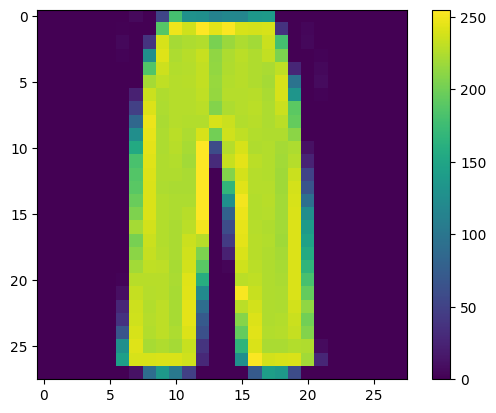

In [9]:
plt.figure()
plt.imshow(train_images[1509])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [10]:
train_images = train_images/255
test_images = test_images/255

In [49]:
model = keras.Sequential([ # Sequential will give the most basic NN
            keras.layers.Flatten(input_shape = (28, 28)), # input layer
            keras.layers.Dense(128, activation = 'relu'), # hidden layer
            keras.layers.Dense(10, activation = 'softmax') # output layer
            ]) # in softmax all the values will be b/w 0 and 1 and they add upto 1.

**OPTIMIZATION**

In [51]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5024 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3795 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3403 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3152 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2703 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2597 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2498 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

In [54]:
test_loss, test_accu = model.evaluate(test_images, test_labels, verbose = 1)

313/313 [==============================] - 0s 949us/step - loss: 0.3380 - accuracy: 0.8783


In [16]:
print('Test Accuracy:', test_accu*100, "%")

Test Accuracy: 87.87999749183655 %


In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [18]:
predictions[0]

array([1.1432194e-07, 2.2401780e-10, 9.1008985e-07, 2.3731683e-10,
       9.8641624e-07, 3.6628408e-04, 2.2670527e-07, 9.7498558e-03,
       8.3546929e-08, 9.8988146e-01], dtype=float32)

In [19]:
b = np.argmax(predictions[0])
b

9

In [20]:
print(class_names[b])

Ankle boot


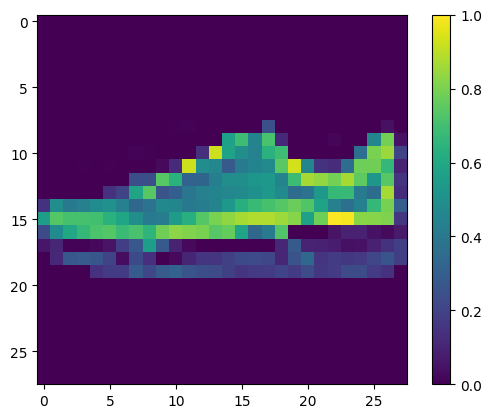

In [21]:
plt.figure()
plt.imshow(test_images[b])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR


Pick a number:  6


1/1 [==============================] - 0s 22ms/step


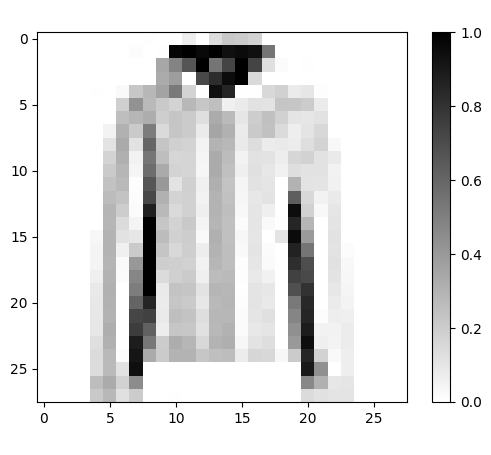

In [24]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

In [27]:
for layer in model.layers:#Freeze the weights
    layer.trainable = False

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 0
Non-trainable params: 101,770
_________________________________________________________________


In [29]:
model.save('mnist_classifier/')

INFO:tensorflow:Assets written to: mnist_classifier/assets


**AUTO ML- to find the best model and find best hyperparameters**

In [37]:
import autokeras as ak

In [40]:
clf = ak.ImageClassifier(overwrite = True, max_trials = 1)

In [41]:
auto = clf.fit(train_images, train_labels, epochs = 10)

Trial 1 Complete [00h 10m 26s]
val_loss: 0.2244262844324112

Best val_loss So Far: 0.2244262844324112
Total elapsed time: 00h 10m 26s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.4308 - accuracy: 0.8456
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3168 - accuracy: 0.8872
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2788 - accuracy: 0.8991
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2584 - accuracy: 0.9066
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2427 - accuracy: 0.9102
Epoch 6/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.2330 - accuracy: 0.9152
Epoch 7/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2238 - accuracy: 0.9195
Epoch 8/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2168 - accuracy: 0.9

INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [43]:
model_auto = clf.export_model()
model_auto.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             